# Plotting your first graph

In [1]:
# First we need to import the matplotlib library.
import matplotlib

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc. When running python using the command line, the graphs are typically shown in a separate window. In a Jupyter notebook, we can simply output the graphs within the notebook itself by running the %matplotlib inline magic command.

In [2]:
%matplotlib inline
# matplotlib.use("TKAgg")  # use this instead in your program if you want to use Tk as your graphics backend.

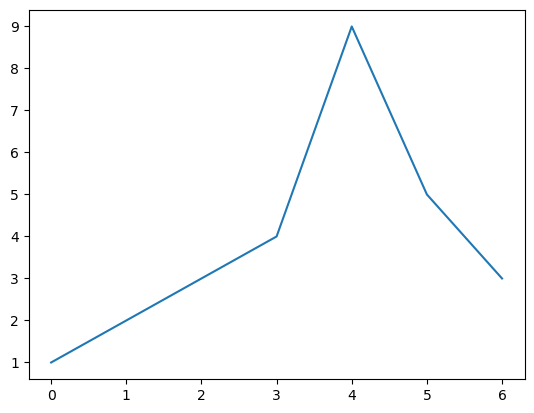

In [3]:
# Now let's plot our first graph! :)
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 9, 5, 3])
plt.show()

Yep, it's as simple as calling the plot function with some data, and then calling the show function!

If the plot function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate. You can also provide two arrays: one for the horizontal axis x, and the second for the vertical axis y:

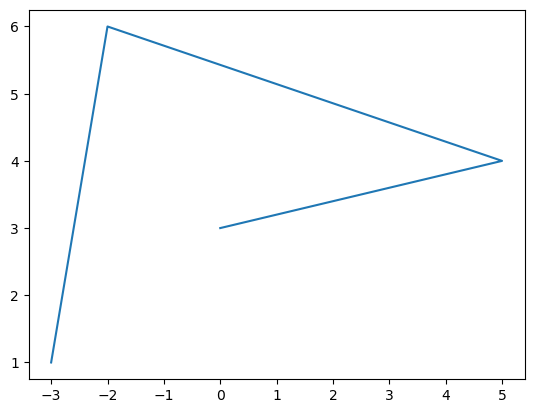

In [4]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

The axes automatically match the extent of the data. We would like to give the graph a bit more room, so let's call the axis function to change the extent of each axis [xmin, xmax, ymin, ymax].

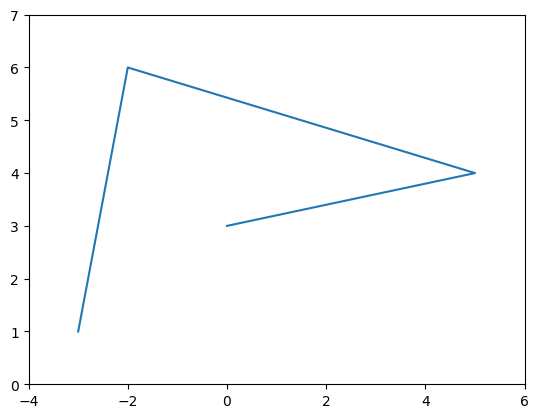

In [10]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

Now, let's plot a mathematical function. We use NumPy's linspace function to create an array x containing 500 floats ranging from -2 to 2, then we create a second array y computed as the square of x (to learn about NumPy, read the NumPy tutorial).

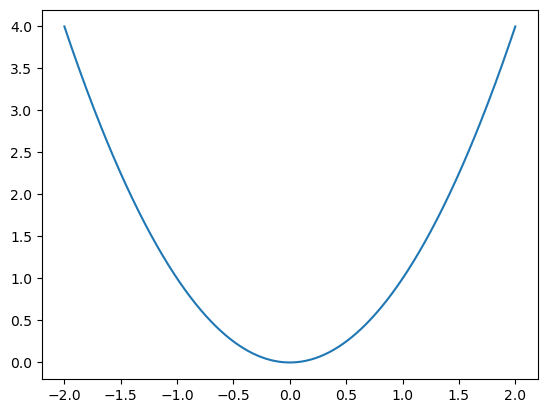

In [11]:
import numpy as np
x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

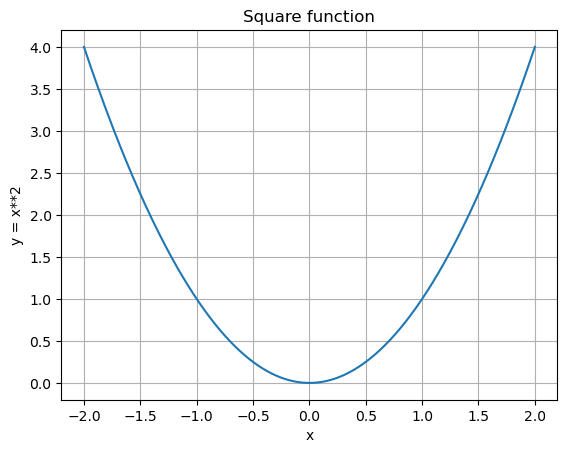

In [12]:
# hat's a bit dry, let's add a title, and x and y labels, and draw a grid.
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

# Line style and color

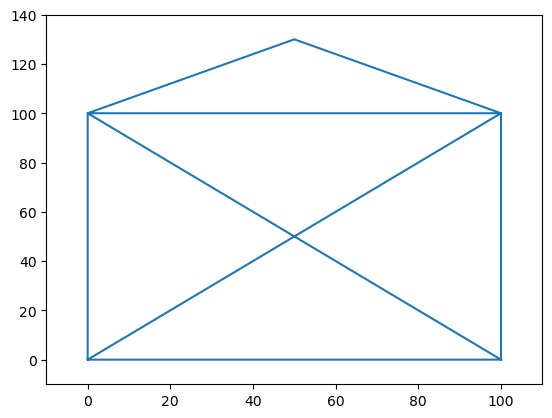

In [14]:
# By default, matplotlib draws a line between consecutive points.
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

You can pass a 3rd argument to change the line's style and color. For example "g--" means "green dashed line".

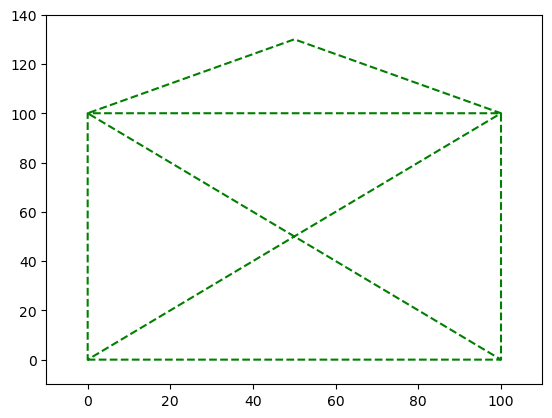

In [18]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can plot multiple lines on one graph very simply: just pass x1, y1, [style1], x2, y2, [style2], ...



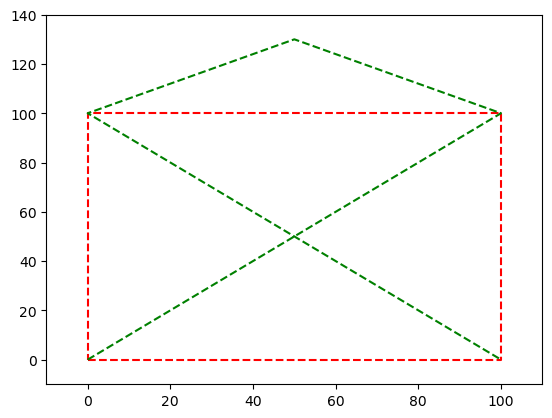

In [19]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r--", [0, 100, 50, 0, 100], [0, 100, 130, 100,0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

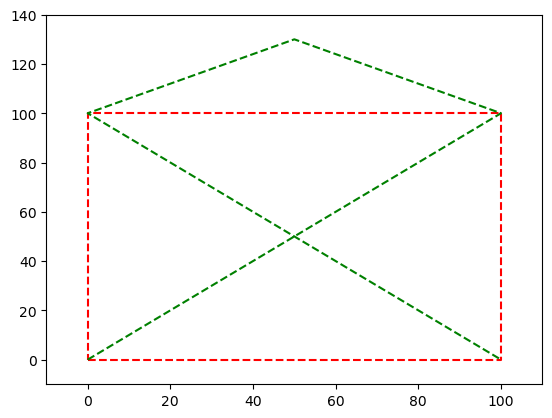

In [20]:
# Or simply call plot multiple times before calling show.
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r--")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles. Check out the documentation for the full list of style & color options.

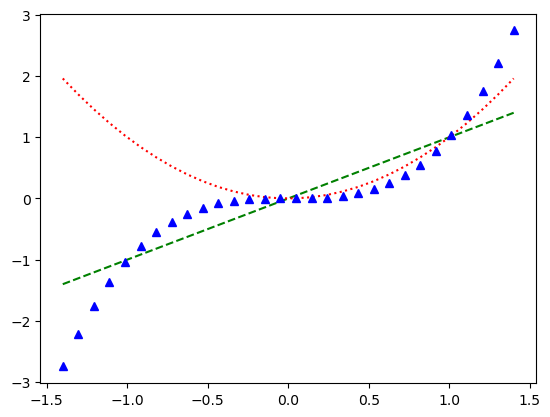

In [21]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

The plot function returns a list of Line2D objects (one for each line). You can set extra attributes on these lines, such as the line width, the dash style or the alpha level. See the full list of attributes in the documentation.

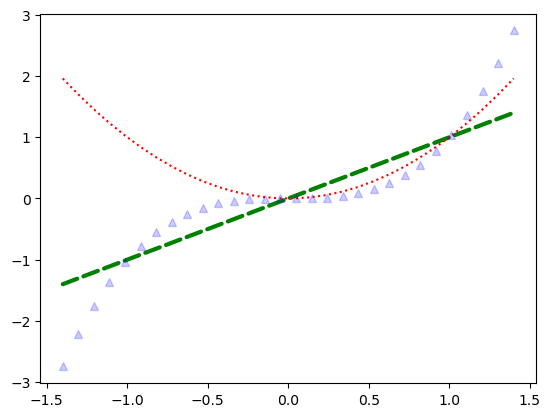

In [25]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line1.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

# Saving a figure

Saving a figure to disk is as simple as calling savefig with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

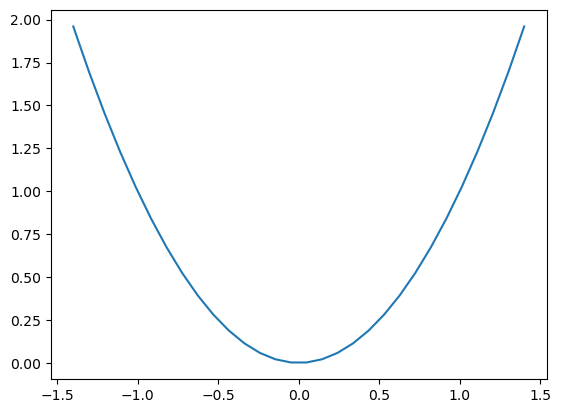

In [27]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_squares_function.png", transparent=True)

# Subplots

A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the subplot function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling plt.gca()), so when you call the plot function, it draws on the active subplot.

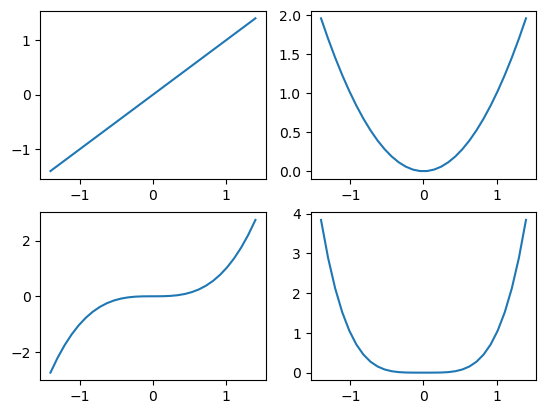

In [28]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4) # # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

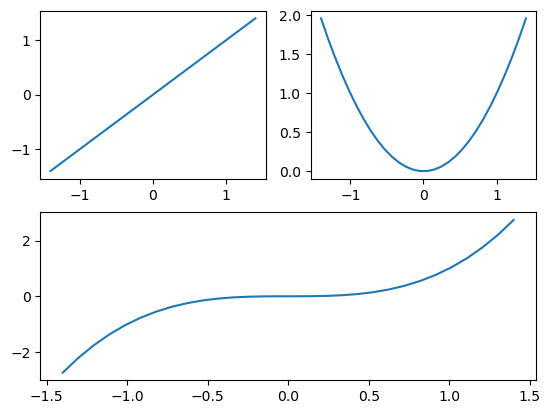

In [29]:
# It is easy to create subplots that span across multiple grid cells like so:
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2) # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

If you need more complex subplot positionning, you can use subplot2grid instead of subplot. You specify the number of rows and columns in the grid, then your subplot's position in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans. For example:

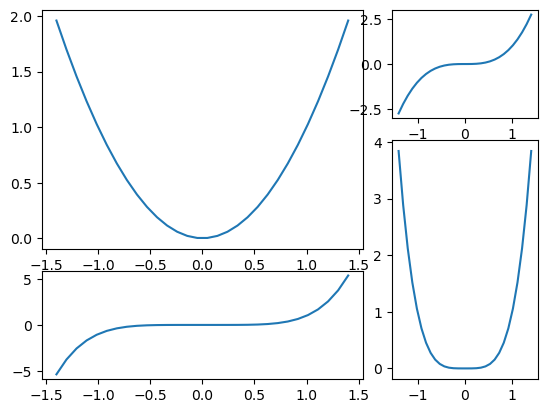

In [30]:
plt.subplot2grid((3,3), (0,0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0,2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1,2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

# Multiple figures

It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates figure(1) automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling plt.gcf()), and the active subplot of that figure becomes the current subplot.

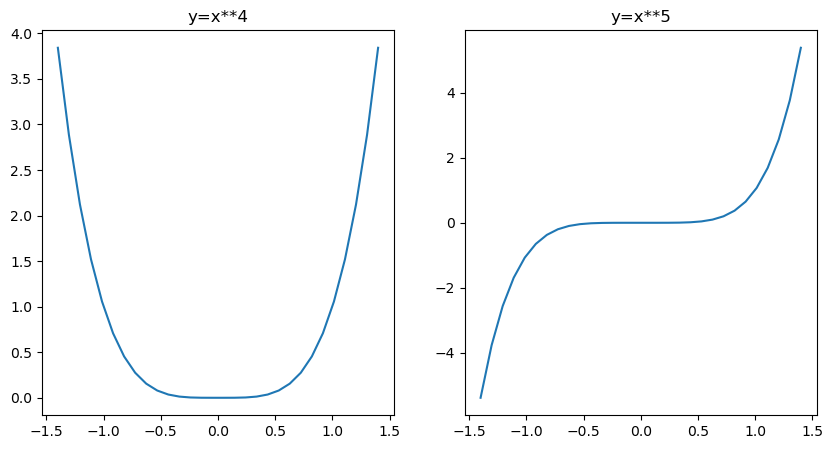

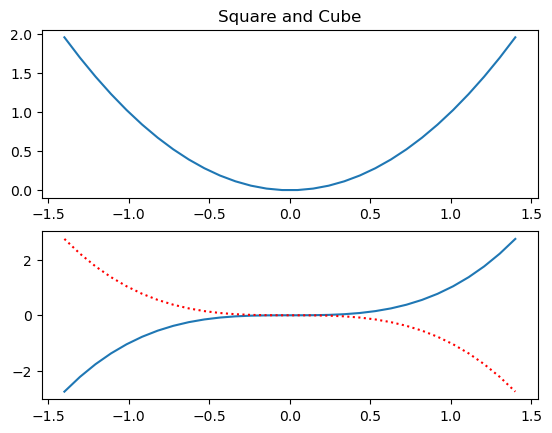

In [32]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)


plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y=x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y=x**5")

plt.figure(1)  # back to figure 1, current subplot is 212 (bottom)
plt.figure(1)
plt.plot(x, -x**3, "r:")
plt.show()


# Pyplot's state machine: implicit vs explicit

So far we have used Pyplot's state machine which keeps track of the currently active subplot. Every time you call the plot function, pyplot just draws on the currently active subplot. It also does some more magic, such as automatically creating a figure and a subplot when you call plot, if they don't exist yet. This magic is convenient in an interactive environment (such as Jupyter).

But when you are writing a program, explicit is better than implicit. Explicit code is usually easier to debug and maintain, and if you don't believe me just read the 2nd rule in the Zen of Python:

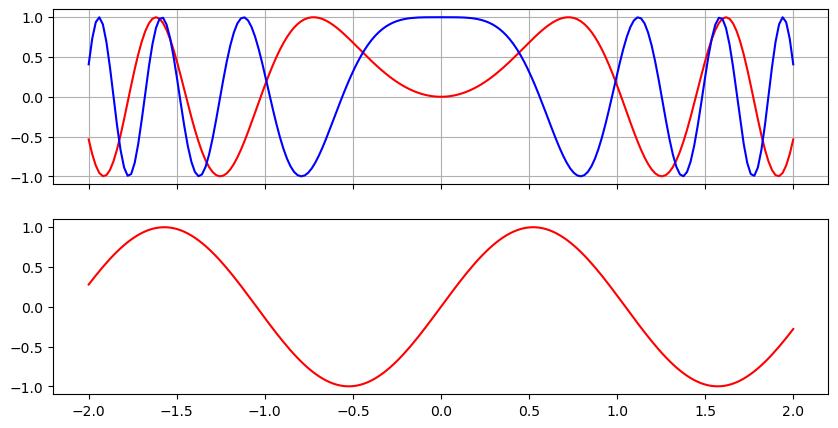

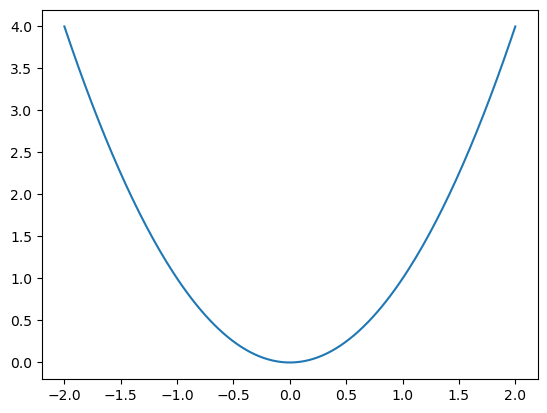

In [40]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex= True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

For consistency, we will continue to use pyplot's state machine in the rest of this tutorial, but we recommend using the object-oriented interface in your programs.

# Pylab vs Pyplot vs Matplotlib

There is some confusion around the relationship between pylab, pyplot and matplotlib. It's simple: matplotlib is the full library, it contains everything including pylab and pyplot.

Pyplot provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library.

Pylab is a convenience module that imports matplotlib.pyplot and NumPy in a single name space. You will find many examples using pylab, but it is no longer recommended (because explicit imports are better than implicit ones).

# Drawing text

You can call text to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes. Any text in matplotlib may contain TeX equation expressions, see the documentation for more details.

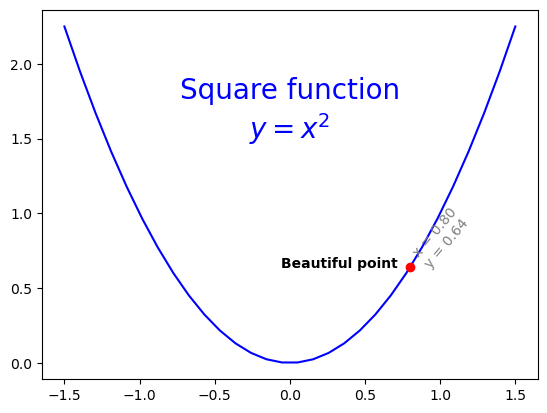

In [42]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment = "center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

ha is an alias for horizontalalignment

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The annotate function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

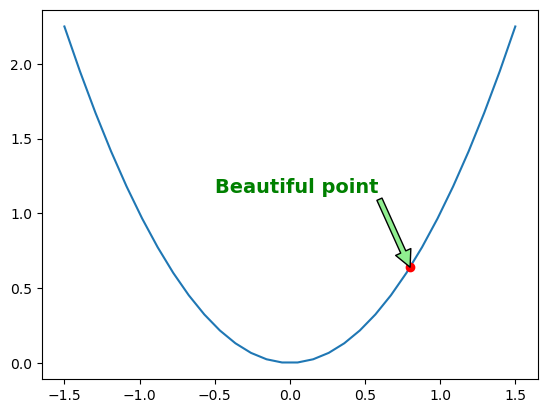

In [51]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
            color="green", weight="heavy", fontsize=14,
            arrowprops={"facecolor": "lightgreen"})
plt.show()

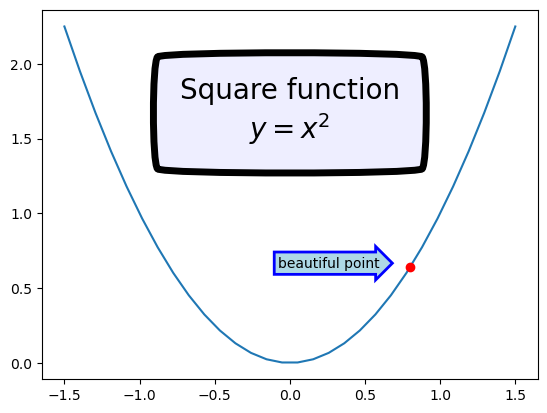

In [54]:
# you can also add a bounding box around your text by using the bbox attribute:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow, pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4, pad=1, rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

Just for fun, if you want an xkcd-style plot, just draw within a with plt.xkcd() section:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

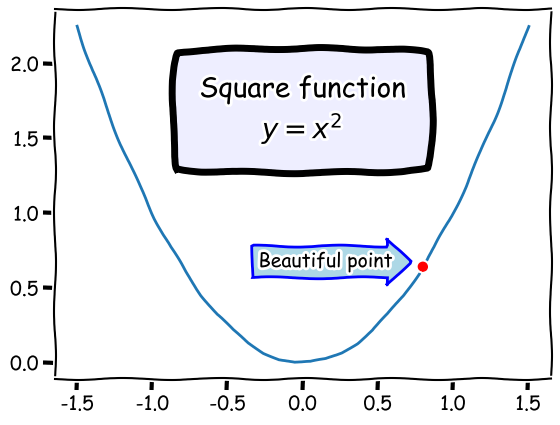

In [59]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

# Legends

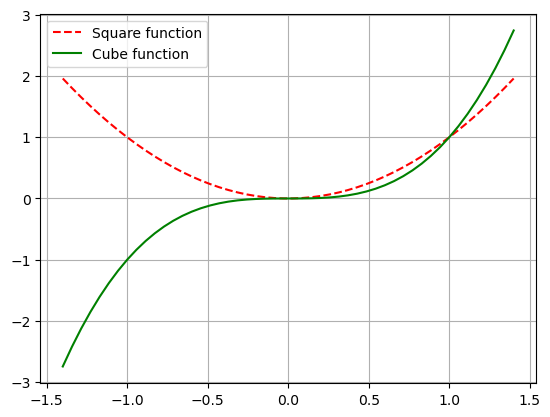

In [60]:
# The simplest way to add a legend is to set a label on all lines, then just call the legend function.
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Non linear scales

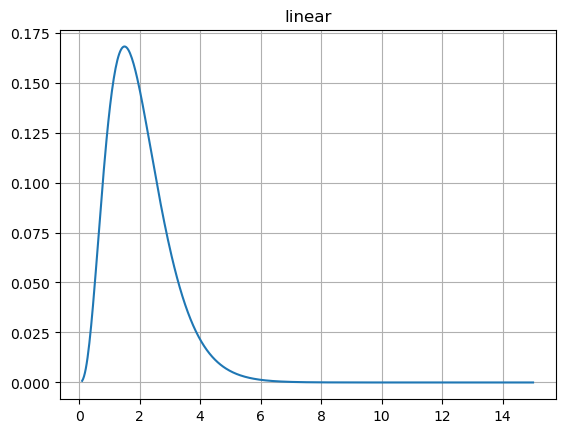

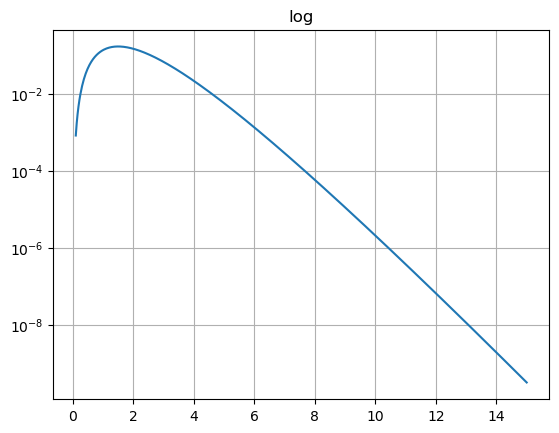

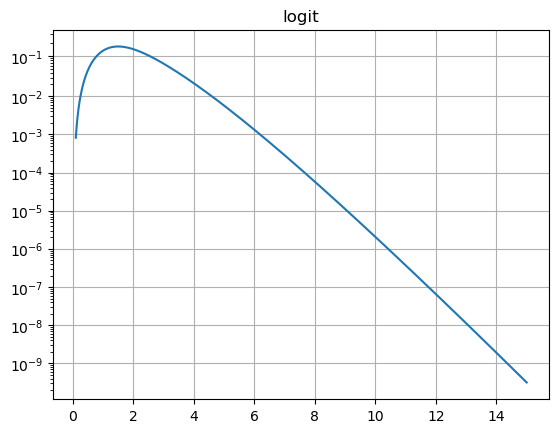

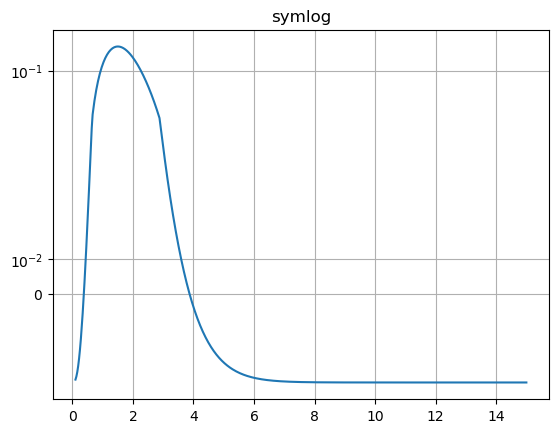

In [63]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.figure(3)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.figure(4)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.05)
plt.title('symlog')
plt.grid(True)

plt.show()

# Ticks and tickers

The axes have little marks called "ticks". To be precise, "ticks" are the locations of the marks (eg. (-1, 0, 1)), "tick lines" are the small lines drawn at those locations, "tick labels" are the labels drawn next to the tick lines, and "tickers" are objects that are capable of deciding where to place ticks. The default tickers typically do a pretty good job at placing ~5 to 8 ticks at a reasonable distance from one another.

But sometimes you need more control (eg. there are too many tick labels on the logit graph above). Fortunately, matplotlib gives you full control over ticks. You can even activate minor ticks.

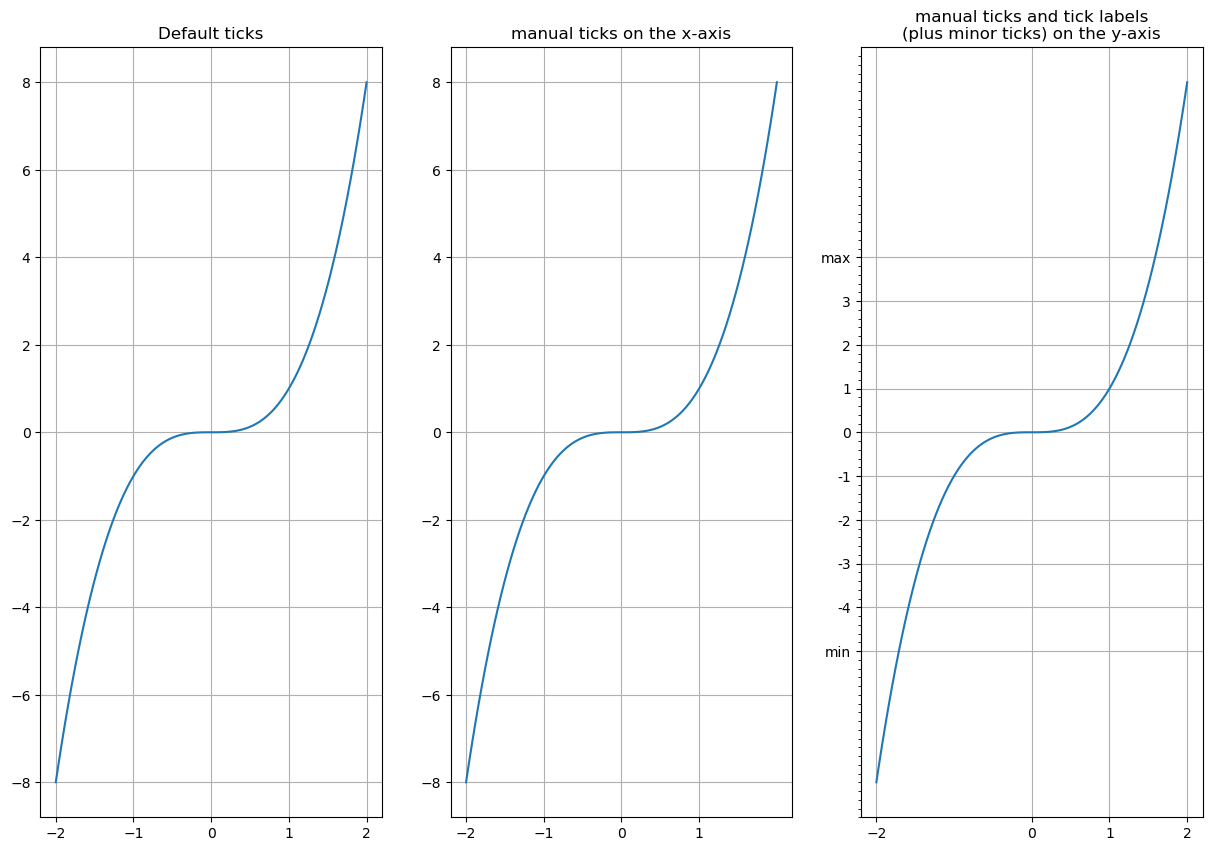

In [64]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("manual ticks and tick labels\n(plus minor ticks) on the y-axis")

plt.grid(True)

plt.show()

# Polar projection

Drawing a polar graph is as easy as setting the projection attribute to "polar" when creating the subplot.

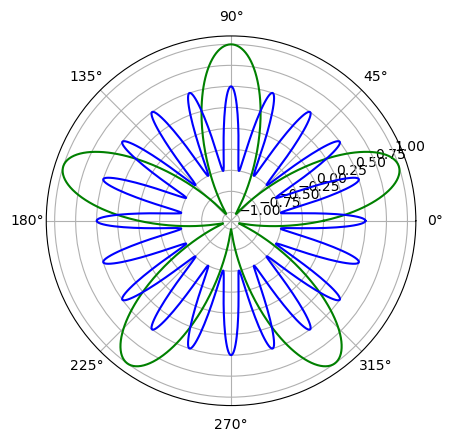

In [68]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111, projection='polar')
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

# 3D projection

Plotting 3D graphs is quite straightforward. You need to import Axes3D, which registers the "3d" projection. Then create a subplot setting the projection to "3d". This returns an Axes3DSubplot object, which you can use to call plot_surface, giving x, y, and z coordinates, plus optional attributes.

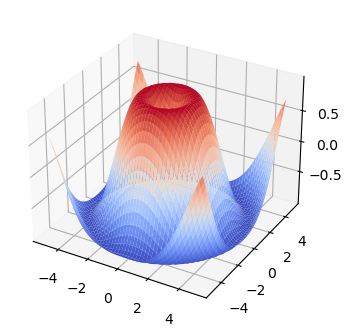

In [74]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

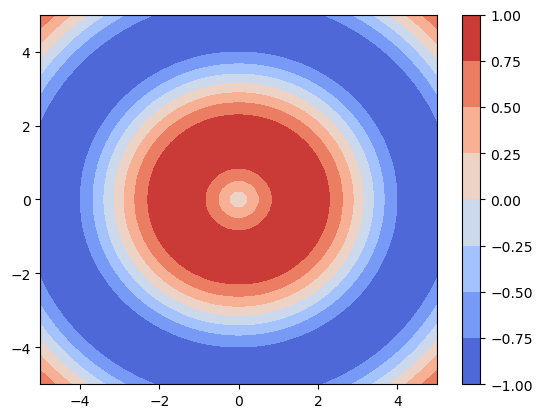

In [75]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

# Scatter plot

To draw a scatter plot, simply provide the x and y coordinates of the points.

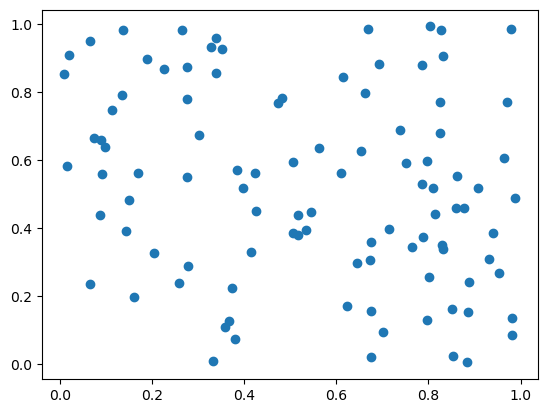

In [76]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

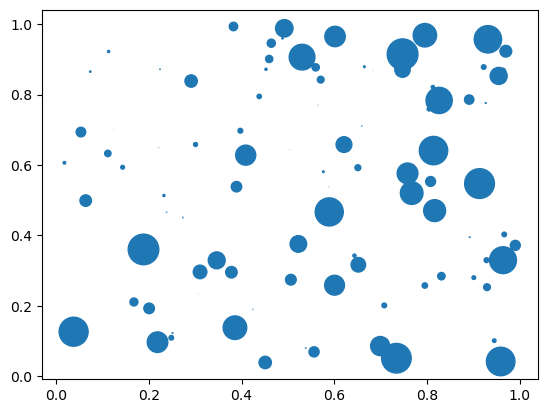

In [77]:
# You may also optionally provide the scale of each point.
x, y, scale = rand(3, 100)
scale = 500 * scale**5
plt.scatter(x, y, s=scale)
plt.show()

And as usual there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.

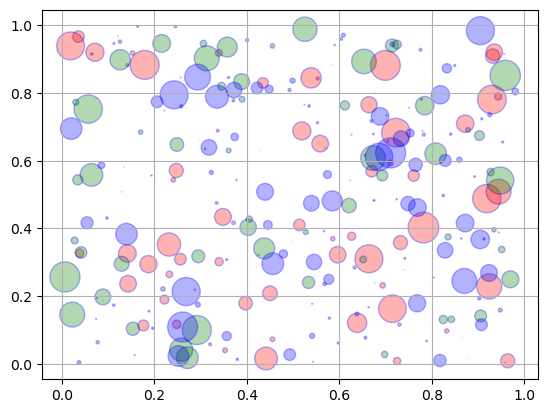

In [81]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')
    
plt.grid(True)
plt.show()

# Lines

You can draw lines simply using the plot function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the hlines and vlines functions that plot horizontal and vertical line segments. For example:

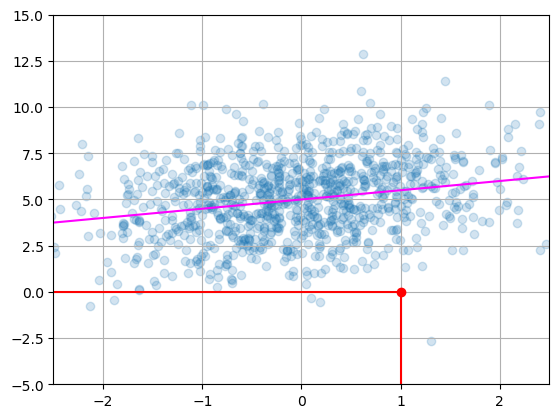

In [82]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()
    

# Histograms

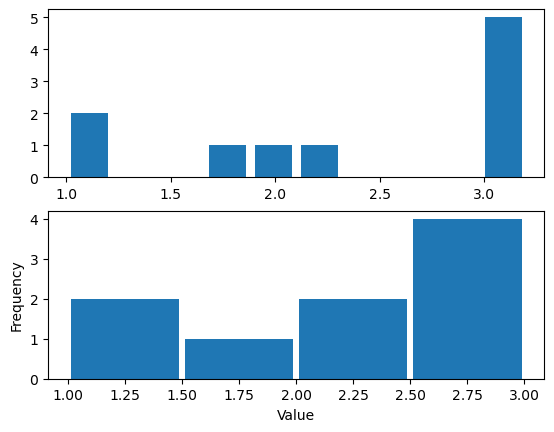

In [86]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

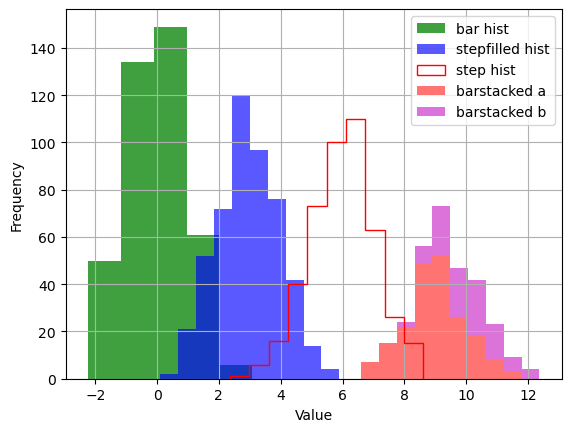

In [90]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200)+ 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype= 'step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Images

Reading, generating and plotting images in matplotlib is quite straightforward.

To read an image, just import the matplotlib.image module, and call its imread function, passing it the file name (or file object). This returns the image data, as a NumPy array. Let's try this with the my_square_function.png image we saved earlier.

In [91]:
import matplotlib.image as mpimg

img = mpimg.imread('My_square_function.png')
print(img.shape, img.dtype)

FileNotFoundError: [Errno 2] No such file or directory: 'My_square_function.png'